# Pi = f0**2

In [7]:
import numpy as np
from scipy.optimize import fsolve
import math
import matplotlib.pyplot as plt
from subprocess import call

In [109]:
# Polynomial
def f0_poly4_f0sqasPi(f0, pi1, pi2, q1, q2, l, mu):
    K, q0 = q2, 1.0
    r1 = q0*(mu/K + (1-mu)/q1)
    r2 = q0*(mu/K + (1-mu)/q2)
    # a f0**4 + b f0**3 + c f0**2 + d f0 + e = 0
    a = l*(1-l)*(pi1+pi2)
    b = -(1-l)*(pi1*r1 + pi2*r2) - l**2
    c = l*(r1 + r2) + l**2
    d = -l*(r1+r2) - r1*r2
    e = r1*r2
    return a*f0**4 + b*f0**3 + c*f0**2 + d*f0 + e

def f0_poly4_deriv_f0sqasPi(f0, pi1, pi2, q1, q2, l, mu):
    K, q0 = q2, 1.0
    r1 = q0*(mu/K + (1-mu)/q1)
    r2 = q0*(mu/K + (1-mu)/q2)
    # a f0**3 + b f0**2 + c f0 + d = 0
    a = 4*l*(1-l)*(pi1+pi2)
    b = 3*(-(1-l)*(pi1*r1 + pi2*r2) - l**2)
    c = 2*((l*(r1 + r2) + l**2))
    d = -l*(r1+r2) - r1*r2
    return a*f0**3 + b*f0**2 +c*f0 + d

def f0poly_liml1(f0, q1, q2, mu):
    K, q0 = q2, 1.0
    r1 = q0*(mu/K + (1-mu)/q1)
    r2 = q0*(mu/K + (1-mu)/q2)
    # a f0**3 + b f0**2 + c f0 + d = 0
    a = -1
    b = (r1+r2) + 1
    c = -r1 -r2 -r1*r2
    d = r1*r2
    return a*f0**3 + b*f0**2 +c*f0**2 + d

def f0poly_liml0(f0, pi1, pi2, q1, q2, mu):
    K, q0 = q2, 1.0
    r1 = q0*(mu/K + (1-mu)/q1)
    r2 = q0*(mu/K + (1-mu)/q2)
    # a f0**3 + b f0**2 + c f0 + d = 0
    a = -(pi1*r1 + pi2*r2)
    b = 0
    c = -r1*r2
    d = r1*r2
    return a*f0**3 + b*f0**2 +c*f0**2 + d

In [106]:
# f0vals = np.arange(0.0,1.001,0.001)
# f0vals = np.arange(-1.0,1.001,0.001)
f0vals = np.arange(-3.0,3.01,0.01)
# f0vals = np.arange(-100.0,100.1,0.1)
pi = 1.0
q = 10.0
l = 0.6
mu = 0.0
f0polyVals = f0_poly4_f0sqasPi(f0vals, pi, pi, q, q, l, mu)
f0polyDerivVals = f0_poly4_deriv_f0sqasPi(f0vals, pi, pi, q, q, l, mu)
# f0polyVals_l1 = f0poly_liml1(f0vals, q, q, mu)
# f0polyVals_l0 = f0poly_liml0(f0vals, pi, pi, q, q, mu)

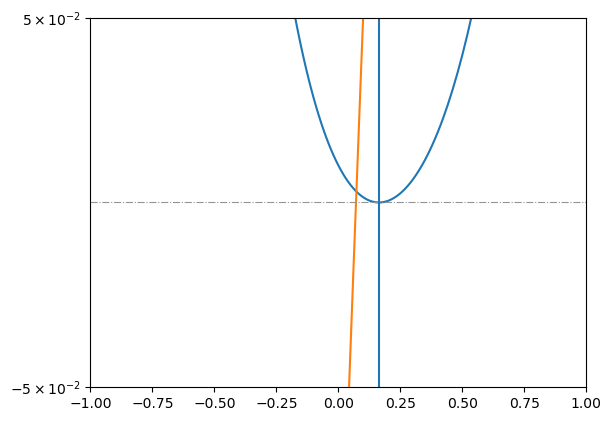

In [113]:
fig, ax = plt.subplots()
ax.plot(f0vals, f0polyVals)
ax.plot(f0vals, f0polyDerivVals) # algo falla aqui...
# ax.plot(f0vals, f0polyVals_l0)
ax.axhline(0.0, ls='-.', lw=0.8, color='xkcd:gray')
ax.set(yscale='symlog', ylim=(-0.05, 0.05))
ax.set_xlim(-1,1)
ax.axvline(0.16340442495333016)

In [103]:
sol1 = fsolve(f0_poly4_f0sqasPi, 0.1, args=(pi, pi, q, q, l, mu))
print(sol1[0])

sol2 = fsolve(f0_poly4_f0sqasPi, 0.25, args=(pi, pi, q, q, l, mu))
print(sol2[0])

sol3 = fsolve(f0_poly4_f0sqasPi, 1.5, args=(pi, pi, q, q, l, mu))
print(sol3[0])

sol4 = fsolve(f0_poly4_f0sqasPi, -1000, args=(pi, pi, q, q, l, mu))
print(sol4[0])

0.16014611655154945
0.16666666666666796
0.16666666666666788
0.16014611655154937


In [112]:
sol = fsolve(f0_poly4_deriv_f0sqasPi, 0.16, args=(pi, pi, q, q, l, mu))
print(sol[0])

0.16340442495333016


In [35]:
1/(q*l)

0.1000100010001

In [50]:
sol = fsolve(f0poly_liml0, 0.5, args=(pi, pi, q, q, mu))

In [51]:
sol[0]

0.35246779125005645

In [62]:
0.1**(1/2)/0.1**(1/3)/

0.481746241999498

In [67]:
f0_poly4_f0sqasPi(-10,1,1,10,10,0.5,0)

5386.110000000001